In [2]:
import pandas as pd
import miceforest as mf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [17]:
data = pd.read_csv("Sustainability_Data.csv")

In [18]:
data_for_imputation = data.drop(['Country', 'Year'], axis=1)

data_for_imputation = data_for_imputation.apply(pd.to_numeric, errors='coerce')

kernel = mf.ImputationKernel(
    data_for_imputation,
    num_datasets = 1,
    mean_match_candidates=0,
    random_state = 28
    )


kernel.mice(30)
imputed_data = kernel.complete_data(0)

imputed_data['Country'] = data['Country']
imputed_data['Year'] = data['Year']

imputed_data.to_csv("Testing.csv", index=False)

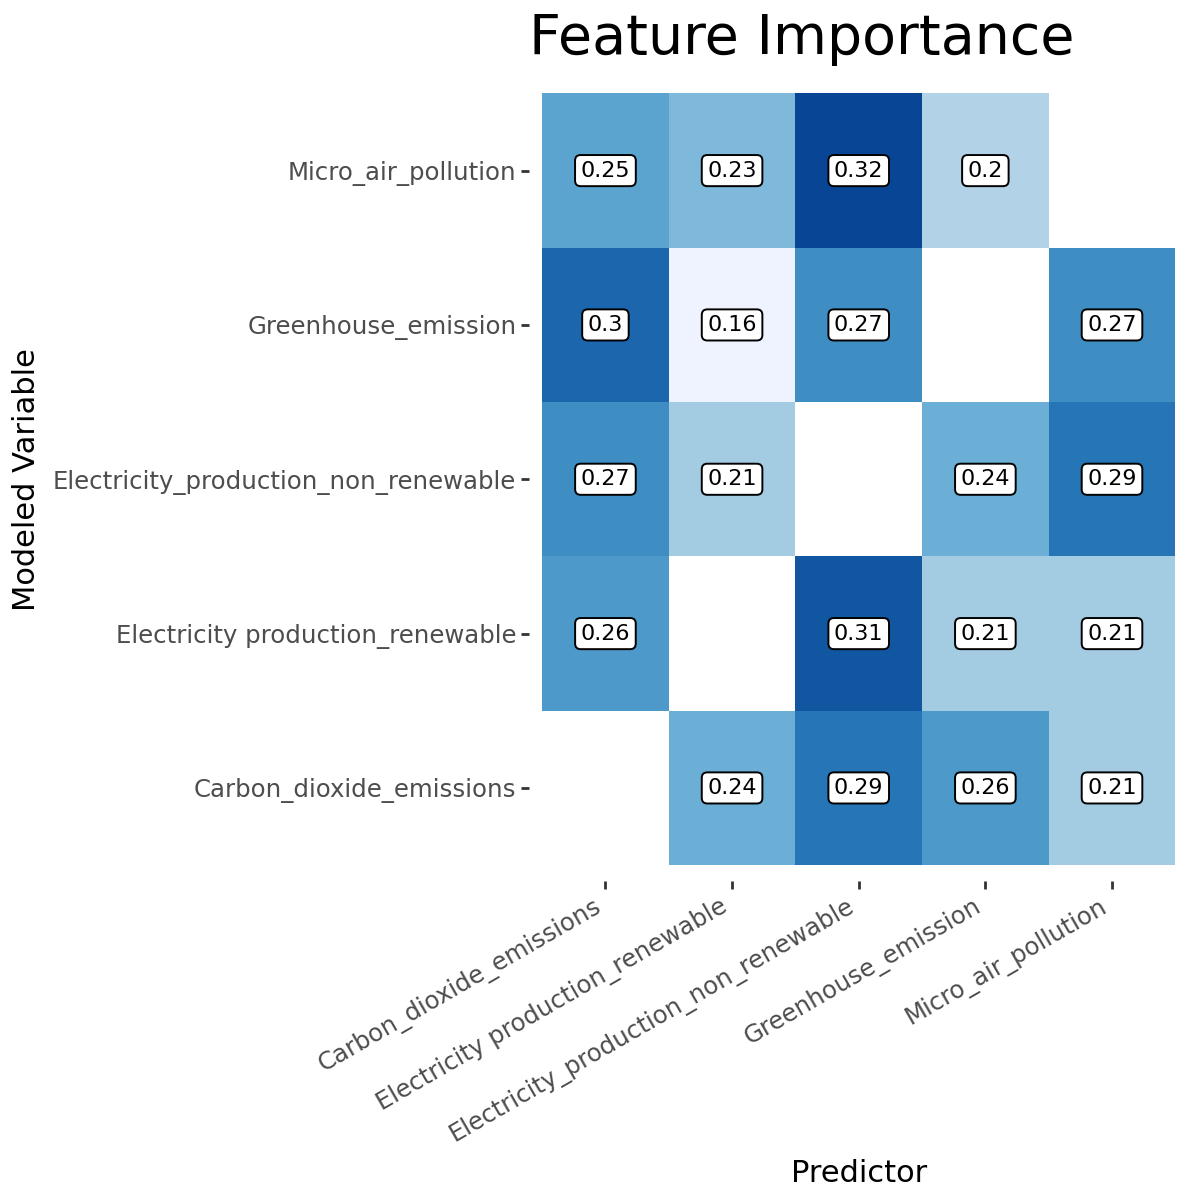

In [19]:
kernel.plot_feature_importance(dataset=0)

In [21]:
optimal_params = kernel.tune_parameters(
    dataset=0, 
    use_gbdt=True,
    num_iterations=500,
    random_state=1,
)
kernel.mice(1, variable_parameters=optimal_params)
pd.DataFrame(optimal_params)

,Micro_air_pollution,Electricity production_renewable,Electricity_production_non_renewable,Carbon_dioxide_emissions,Greenhouse_emission
boosting,gbdt,gbdt,gbdt,gbdt,gbdt
data_sample_strategy,bagging,bagging,bagging,bagging,bagging
num_iterations,500,500,500,500,363
max_depth,5,4,4,5,4
num_leaves,23,17,11,19,5
min_data_in_leaf,2,8,1,9,1
min_sum_hessian_in_leaf,0.01,0.01,0.01,0.01,0.01
min_gain_to_split,0.0,0.0,0.0,0.0,0.0
bagging_fraction,0.999136,0.501521,0.582307,0.795465,0.209209
feature_fraction_bynode,0.31248,0.299912,0.697415,0.237637,0.140097


In [22]:
kernel.mice(30,variable_parameters=optimal_params)
imputed_data = kernel.complete_data(0)

imputed_data['Country'] = data['Country']
imputed_data['Year'] = data['Year']

imputed_data.to_csv('Imputed_Sustainability_Data.csv', index=False)

In [3]:
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from factor_analyzer.factor_analyzer import calculate_kmo

df = pd.read_csv("Testing.csv")

df= df.interpolate(method='linear', limit_direction='forward', axis=0)

df_numeric = df.drop(columns=['Country', 'Year'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

C:\Users\Tanay\AppData\Local\Temp\ipykernel_15824\3533113359.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df= df.interpolate(method='linear', limit_direction='forward', axis=0)


np.float64(0.6192560893229444)

C:\Users\Tanay\AppData\Local\Temp\ipykernel_15824\1383835699.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data_clean[column].dropna(), label="Original (Non-Missing)", color='blue', shade=True, ax=axes[idx])
C:\Users\Tanay\AppData\Local\Temp\ipykernel_15824\1383835699.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(imputed_data_clean[column].loc[missing_indices], label="Imputed", color='red', shade=True, ax=axes[idx])
C:\Users\Tanay\AppData\Local\Temp\ipykernel_15824\1383835699.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original_data_clean[column].dropna(), label="Original (Non-Missing)", c

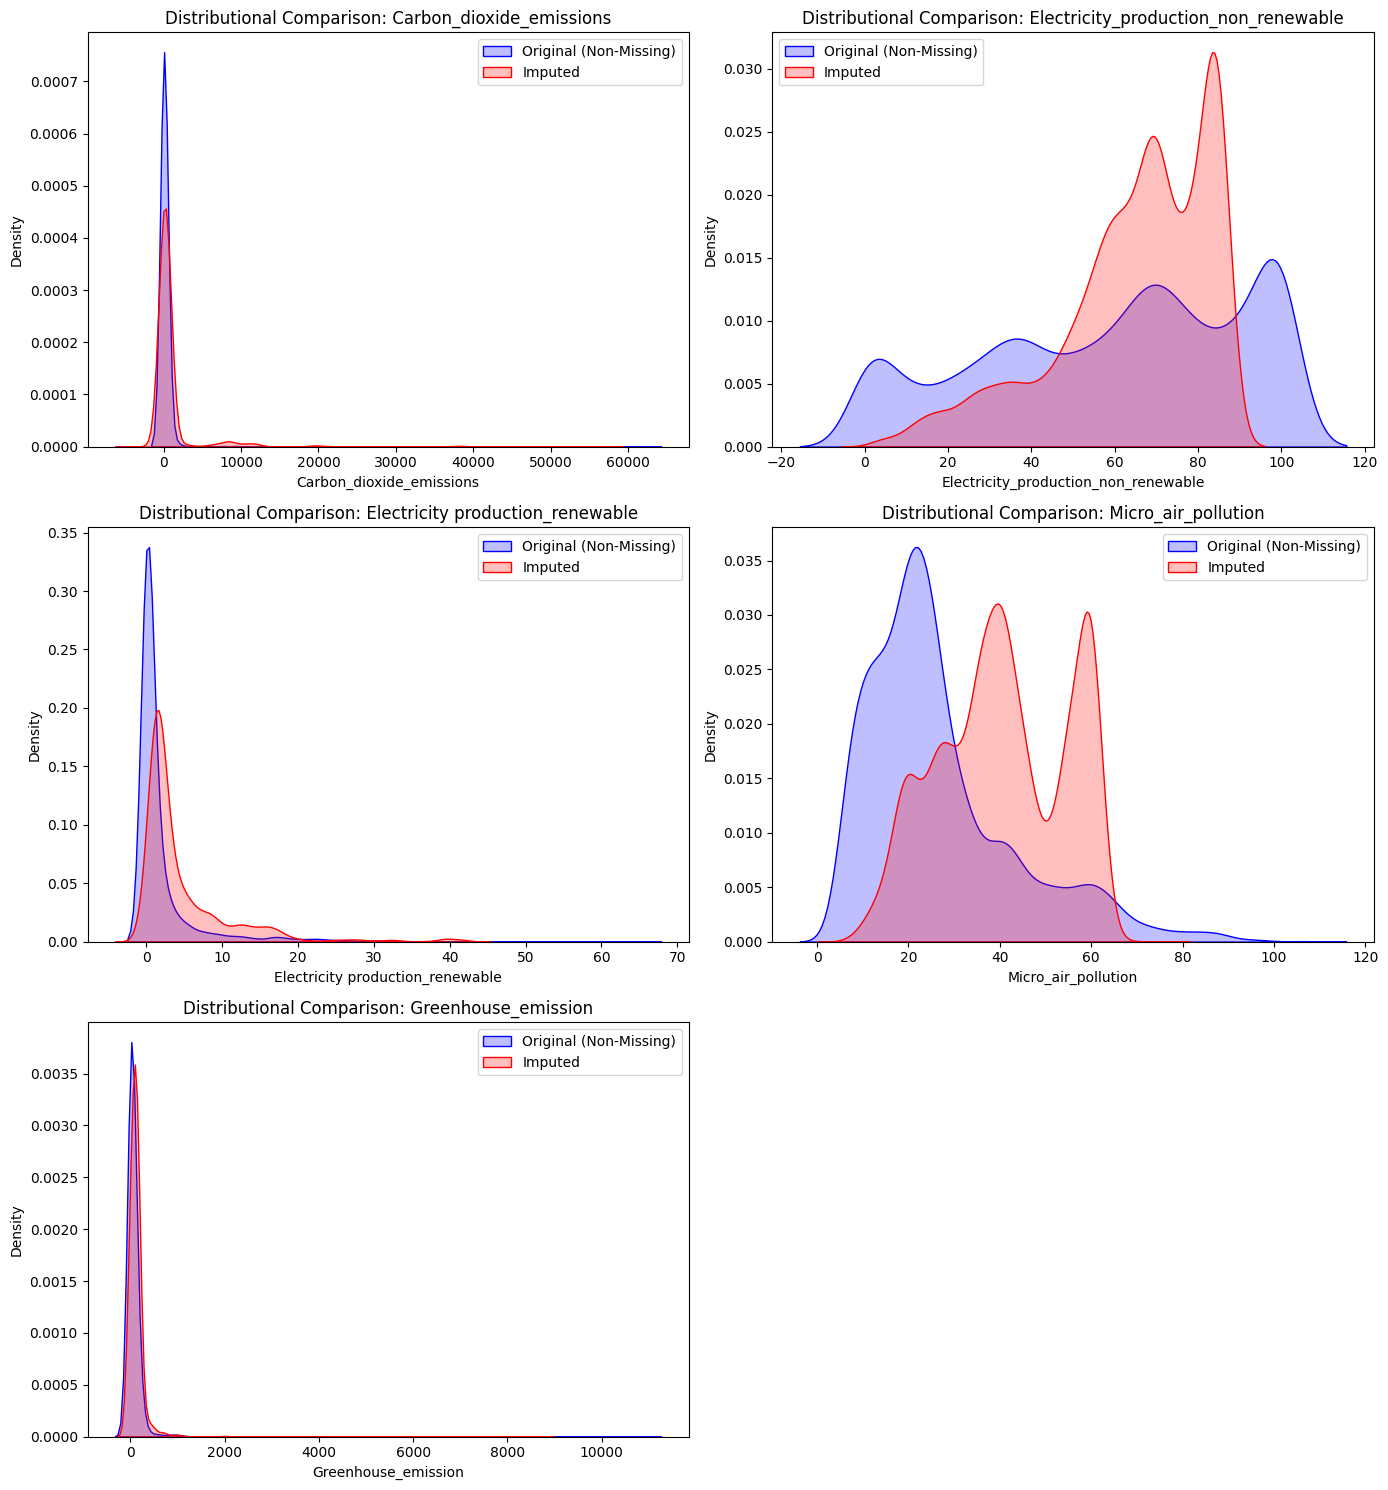

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset (assuming 'Sustainability_Data.csv' exists in your working directory)
original_data = pd.read_csv("Sustainability_Data.csv")
imputed_data = pd.read_csv("Imputed_Sustainability_Data.csv")  # Ensure imputed data is loaded

# Clean the data by dropping 'Country' and 'Year' columns
original_data_clean = original_data.drop(['Country', 'Year'], axis=1)
imputed_data_clean = imputed_data.drop(['Country', 'Year'], axis=1)

# Convert to numeric, coercing errors to NaN
original_data_clean = original_data_clean.apply(pd.to_numeric, errors='coerce')
imputed_data_clean = imputed_data_clean.apply(pd.to_numeric, errors='coerce')

# Set up subplots
num_columns = len(original_data_clean.columns)
fig, axes = plt.subplots(nrows=num_columns // 2 + num_columns % 2, ncols=2, figsize=(14, num_columns * 3))
axes = axes.flatten()  # Flatten for easy indexing

# Loop through each column and plot the distributions in subplots
for idx, column in enumerate(original_data_clean.columns):
    sns.kdeplot(original_data_clean[column].dropna(), label="Original (Non-Missing)", color='blue', shade=True, ax=axes[idx])
    missing_indices = original_data_clean[column][original_data_clean[column].isna()].index
    sns.kdeplot(imputed_data_clean[column].loc[missing_indices], label="Imputed", color='red', shade=True, ax=axes[idx])
    
    axes[idx].set_title(f'Distributional Comparison: {column}')
    axes[idx].legend()

# Remove any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
